# Iterative Methods

## Method 1: $A = L + U$ Decomposition

To solve the system $Ax = b$ using this method, follow these steps:

1. **Decompose** matrix $A$ into $L$ and $U$:
   - $L$ is the lower triangular matrix with diagonal entries.
   - $U$ is the upper triangular matrix with 0s on the diagonal.

2. **Initialize** an initial guess $x_0$.

3. **Iterate** to find $x$:
   - Compute $x_1 = L^{-1}(b - Ux_0)$.
   - Repeat the process with $x_{k+1} = L^{-1}(b - Ux_k)$ until the difference between iterations is less than the tolerance level.

## Method 2: $A = L + D + U$ Decomposition

To solve the system $Ax = b$ using this method, follow these steps:

1. **Decompose** matrix $A$ into $L$, $D$, and $U$:
   - $L$ is the strictly lower triangular part of $A$.
   - $D$ is the diagonal part of $A$.
   - $U$ is the strictly upper triangular part of $A$.

2. **Initialize** an initial guess $x_0$.

3. **Iterate** to find $x$:
   - Compute $x_1 = D^{-1}(b - Lx_0 - Ux_0)$.
   - Repeat the process with $x_{k+1} = D^{-1}(b - Lx_k - Ux_k)$ until convergence criteria are met.


# Task 2

In [1]:
import numpy as np

def factor_lu(A):
    A = A.astype(float)
    n = A.shape[0]
    L = np.diag(np.diag(A)) # set diagonal of L is that of A
    U = A # Initialize U
    for i in range(n):
        for j in range(i, n):
            L[j, i] = A[j, i] # lower triangular part
            U[j, i] = 0 # set lower triangular of U is 0
            U[i, i] = 0 # diagonal of U is 0
    return L, U


def factor_ldu(A):
    A = A.astype(float)
    n = A.shape[0]
    L = np.zeros_like(A) # Initialize L
    U = A # Initialize U
    D = np.diag(np.diag(A)) # Extract the diagonal of A for D

    for i in range(n):
        for j in range(i, n):
            L[j, i] = A[j, i] # lower triangular part
            L[i, j] = 0 # diagonal of L is 0
            U[j, i] = 0 # set lower triangular of U is 0
            U[i, i] = 0 # diagonal of U is 0
    return L, D, U

In [2]:
A = np.array([[1,3,5,7],
              [2,4,6,8],
              [1,3,7,8],
              [3,3,4,6]])
print("LU:")
L, U = factor_lu(A)
print("L:\n", L)
print("U:\n", U)
print("L+U:\n",L+U)

print("LDU:")
L, D, U = factor_ldu(A)
print("L:\n", L)
print("D:\n", D)
print("U:\n", U)
print("L+D+U:\n",L+D+U)

LU:
L:
 [[1. 0. 0. 0.]
 [2. 4. 0. 0.]
 [1. 3. 7. 0.]
 [3. 3. 4. 6.]]
U:
 [[0. 3. 5. 7.]
 [0. 0. 6. 8.]
 [0. 0. 0. 8.]
 [0. 0. 0. 0.]]
L+U:
 [[1. 3. 5. 7.]
 [2. 4. 6. 8.]
 [1. 3. 7. 8.]
 [3. 3. 4. 6.]]
LDU:
L:
 [[0. 0. 0. 0.]
 [2. 0. 0. 0.]
 [1. 3. 0. 0.]
 [3. 3. 4. 0.]]
D:
 [[1. 0. 0. 0.]
 [0. 4. 0. 0.]
 [0. 0. 7. 0.]
 [0. 0. 0. 6.]]
U:
 [[0. 3. 5. 7.]
 [0. 0. 6. 8.]
 [0. 0. 0. 8.]
 [0. 0. 0. 0.]]
L+D+U:
 [[1. 3. 5. 7.]
 [2. 4. 6. 8.]
 [1. 3. 7. 8.]
 [3. 3. 4. 6.]]


# Task 3.

## Method 1

In [3]:
import numpy as np

def method1(A, b, tol=1e-5):
    A = A.astype(float)
    x = np.ones_like(b).astype(float) # initialize x
    
    # Decompose A into L and U, call factor_lu() function
    L, U = factor_lu(A)
    
    # error is determined by ||Ax - b||
    error = np.linalg.norm(np.dot(A, x) - b)
    pre_error = error # set previous error for checking divergence
    
    while np.abs(error) > tol:
        x_new = np.linalg.solve(L, b - np.dot(U, x)) # calculate the current approximate solution
        error = np.linalg.norm(np.dot(A, x_new) - b) # update error for stopping criterion
        
        # check for divergence 
        if error > pre_error:
            raise ValueError(f"We detect that the approximation is diverging.")
        
        x = x_new # update x
    return x

A = np.array([[10, -1, 2, 0],
              [1, 11, -1, 3],
              [2, 1, 10, -1],
              [0, 3, 1, 8]])
b = np.array([[6],
              [25],
              [11],
              [15]])
method1_output = method1(A,b)
print(method1_output)

[[0.62733922]
 [2.02010265]
 [0.87335136]
 [1.00829259]]


## Method 2  

In [4]:
def method2(A, b, tol=1e-5):
    A = A.astype(float)
    x = np.zeros_like(b)
    
    # Decompose A into L, D, and U, call factor_ldu() function
    L, D, U = factor_ldu(A)
    
    error = np.linalg.norm(np.dot(A, x) - b)
    pre_error = error # for checking divergence
    
    while np.abs(error) > tol:
        x_new = np.linalg.solve(D, b - np.dot(L, x) - np.dot(U, x)) # calculate the current approximate solution
        error = np.linalg.norm(np.dot(A, x_new) - b) # update error for stopping criterion
        
        # check for divergence 
        if error > pre_error:
            raise ValueError(f"We detect that the approximation is diverging.")
        
        x = x_new # update x
        
    return x

A = np.array([[10, -1, 2, 0],
              [1, 11, -1, 3],
              [2, 1, 10, -1],
              [0, 3, 1, 8]])
b = np.array([[6],
              [25],
              [11],
              [15]])
method2_output = method2(A,b)
print(method2_output)

[[0.62733995]
 [2.02010315]
 [0.87335084]
 [1.00829283]]


In [5]:
# check x
x = np.linalg.solve(A, b)
print("solution:\n",x)

error_1 = np.abs(x - method1_output)
print("Difference between x and method1 solution:\n", error_1)

error_2 = np.abs(x - method2_output)
print("Difference between x and method2 solution:\n", error_2)

solution:
 [[0.62734012]
 [2.02010303]
 [0.87335092]
 [1.0082925 ]]
Difference between x and method1 solution:
 [[9.00323160e-07]
 [3.74374609e-07]
 [4.31773823e-07]
 [8.64187506e-08]]
Difference between x and method2 solution:
 [[1.63222890e-07]
 [1.22032436e-07]
 [8.84527613e-08]
 [3.28817580e-07]]


# Task 4. 

In [6]:
# Singularity Failure
A1 = np.array([[0, 2, 3, 4],
              [1, 5, 6, 7],
              [1, 8, 9, 10],
              [1, 11, 12, 13]])
b1 = np.array([1, 2, 3, 4])
det_A = np.linalg.det(A1)
print(det_A)

0.0


In [7]:
A2 = np.array([[1, 2, 0, 1],
               [2, 1, 2, 0],
               [0, 2, 1, 2],
               [1, 0, 2, 1]])
b2 = np.array([[4], [5], [5], [4]])

print("\nMethod 2 (A = L + D + U):")
L2 = np.tril(A2, k=-1)
D2 = np.diag(np.diag(A2))
U2 = np.triu(A2, k=1)
x2 = np.zeros((4, 1))

print("Iteration results:")
max_iter = 10
for i in range(max_iter):
    x2_new = np.linalg.solve(D2, b2 - np.dot(L2, x2) - np.dot(U2, x2))
    print(f"Iteration {i+1}: {x2_new.flatten()}")
    x2 = x2_new


Method 2 (A = L + D + U):
Iteration results:
Iteration 1: [4. 5. 5. 4.]
Iteration 2: [-10. -13. -13. -10.]
Iteration 3: [40. 51. 51. 40.]
Iteration 4: [-138. -177. -177. -138.]
Iteration 5: [496. 635. 635. 496.]
Iteration 6: [-1762. -2257. -2257. -1762.]
Iteration 7: [6280. 8043. 8043. 6280.]
Iteration 8: [-22362. -28641. -28641. -22362.]
Iteration 9: [ 79648. 102011. 102011.  79648.]
Iteration 10: [-283666. -363313. -363313. -283666.]


# Task 5. 

In [8]:
A = np.array([[-10, 1, 2, 3],
              [1, 11, 2, 3],
              [2, 2, 10, 4],
              [3, 3, 6, 15]])
b = np.array([[1],
              [2],
              [3],
              [4]])
x = np.linalg.solve(A, b)
print("solution:\n", x)

x1 = method1(A, b)
x2 = method2(A, b)
print("method 1 solution:\n", x1)
print("method 2 solution:\n", x2)

solution:
 [[0.00115141]
 [0.09873345]
 [0.21588946]
 [0.16033391]]
method 1 solution:
 [[0.00115119]
 [0.09873394]
 [0.2158888 ]
 [0.16033412]]
method 2 solution:
 [[0.00115144]
 [0.09873324]
 [0.21588887]
 [0.16033425]]


In [9]:
A = np.array([[4, 1, 0, 0], 
              [1, 3, 1, 0], 
              [0, 1, 2, 1], 
              [0, 0, 1, 10]])
b = np.array([[1], [2], [2], [1]])
print(b.T@A@b)

x = np.linalg.solve(A, b)
print("solution:\n", x)
x1 = method1(A, b)
x2 = method2(A, b)
print("method 1 solution:\n", x1)
print("method 2 solution:\n", x2)

[[50]]
solution:
 [[0.16568047]
 [0.33727811]
 [0.82248521]
 [0.01775148]]
method 1 solution:
 [[0.16567859]
 [0.33728026]
 [0.8224839 ]
 [0.01775161]]
method 2 solution:
 [[0.16568075]
 [0.33727931]
 [0.82248587]
 [0.01775174]]


In [10]:
b = np.array([[1], [2], [2], [1]])

# fail
A0 = np.array([[1,3,5,7],
              [2,4,6,8],
              [1,3,7,8],
              [3,3,4,6]])

# converge
A1 = np.array([[10, -1, 2, 0],
              [1, 11, -1, 3],
              [2, 1, 10, -1],
              [0, 3, 1, 8]])
# fail
A2 = np.array([[0, 2, 3, 4],
              [1, 5, 6, 7],
              [1, 8, 9, 10],
              [1, 11, 12, 13]])
# fail
A3 = np.array([[1, 2, 0, 1],
               [2, 1, 2, 0],
               [0, 2, 1, 2],
               [1, 0, 2, 1]])

# converge
A4 = np.array([[-10, 1, 2, 3],
              [1, 11, 2, 3],
              [2, 2, 10, 4],
              [3, 3, 6, 15]])

# method 2 fails
A5 = np.array([[-1, 1, 2, 3],
              [1, 11, 2, 3],
              [2, 2, 10, 4],
              [3, 3, 6, 15]])

# converge
A6 = np.array([[4, 1, 0, 0], 
              [1, 3, 1, 0], 
              [0, 1, 2, 1], 
              [0, 0, 1, 10]])

# method 2 fails
A7 = np.array([[4, 1, 0, 0], 
              [1, 3, 1, 0], 
              [0, 1, 2, 1], 
              [8, 0, 1, 10]])

print("A0:",np.linalg.cond(A0, p=2))
print("A1:", np.linalg.cond(A1, p=2))
print("A2:", np.linalg.cond(A2, p=2))
print("A3:", np.linalg.cond(A3, p=2))
print("A4:", np.linalg.cond(A4, p=2))
print("A5:", np.linalg.cond(A5, p=2))
print("A6:", np.linalg.cond(A6, p=2))
print("A7:", np.linalg.cond(A7, p=2))

A0: 60.948339884293105
A1: 2.0492445966291517
A2: 1.3270656550699805e+19
A3: 10.403882032022084
A4: 2.89428769673837
A5: 12.195256473167674
A6: 8.46821785953181
A7: 12.809684927643232


# Task 6. 

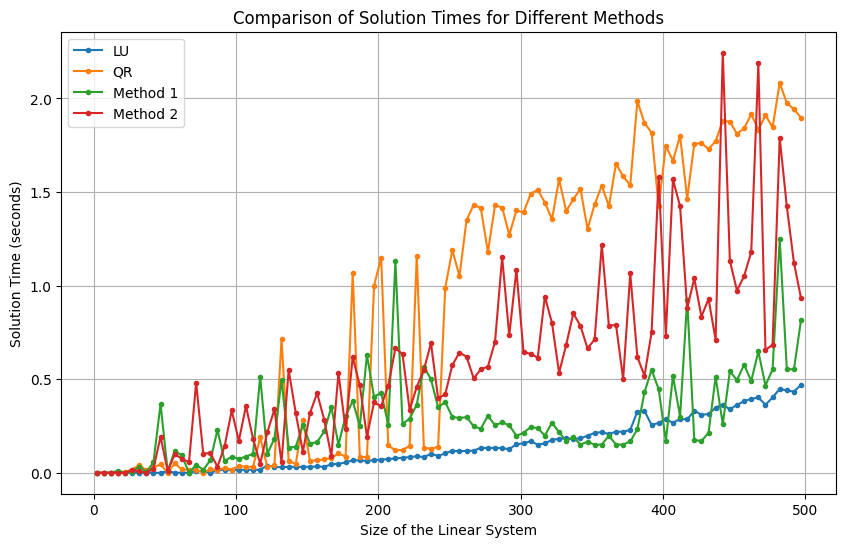

In [13]:
# LU
def myLU(A):
    A = A.astype(float)
    n = A.shape[0] 
    L = np.identity(n)
    U = A.copy()
    for j in range(0,n-1):
        for i in range(j+1,n):
            mult = U[i,j] / U[j,j]
            U[i, j+1:n] = U[i, j+1:n] - mult * U[j,j+1:n]
            L[i,j] = mult
            U[i,j] = 0 
    return L,U

def lsolve(L, b):
    n = b.size 
    y = np.zeros(n)
    for i in range(n): 
        y[i] = b[i] 
        for j in range(i): 
            y[i] = y[i] - L[i,j] * y[j] 
    return y

def usolve(U, y):
    n = y.size
    x = np.zeros(n)
    for i in range(n-1, -1, -1 ):  
        x[i] = y[i] / U[i,i]   
        for j in range(i+1, n):
            x[i] = x[i] - U[i,j] * x[j] / U[i,i] 
    return x

# QR
def myQR(A):
    n = A.shape[0]
    Q = np.zeros((n, n))
    R = np.zeros((n, n))
    for j in range(n):
        q = A[:, j]
        for i in range(j):
            R[i, j] = Q[:, i] @ A[:, j]
            q = q - R[i, j] * Q[:, i]
        R[j, j] = np.linalg.norm(q)
        Q[:, j] = q / R[j, j]
    return Q, R


import numpy as np
import time
import matplotlib.pyplot as plt

# Define the sizes of the linear systems to solve
sizes = np.arange(2, 500, 5)

# Initialize dictionaries to store times for each method
times_LU = {}
times_QR = {}
times_Method1 = {}
times_Method2 = {}

# Solve linear systems for each size and measure the solution times
for size in sizes:
    # Generate a random matrix A and vector b
    # diagonally dominant matrix A and vector b
    A = np.zeros((size, size))
    for i in range(size):
        A[i, i] = np.random.rand() + size
        for j in range(size):
            if i != j:
                A[i, j] = np.random.rand()
    b = np.random.rand(size)
    # Measure time for LU decomposition and solution
    start_time = time.time()
    L1, U1 = myLU(A)
    y1 = lsolve(L1, b)
    x1 = usolve(U1, y1)
    times_LU[size] = time.time() - start_time
    
    # Measure time for QR decomposition and solution
    start_time = time.time()
    Q, R = myQR(A)
    x2 = np.linalg.solve(R, np.dot(Q.T, b))  # x = R^-1 Q^T b
    times_QR[size] = time.time() - start_time
    
    # Measure time for Method 1
    start_time = time.time()
    method1_solution = method1(A, b)
    times_Method1[size] = time.time() - start_time
    
    # Measure time for Method 2
    start_time = time.time()
    method2_solution = method2(A, b)
    times_Method2[size] = time.time() - start_time

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(sizes, list(times_LU.values()), marker='.', label='LU')
plt.plot(sizes, list(times_QR.values()), marker='.', label='QR')
plt.plot(sizes, list(times_Method1.values()), marker='.', label='Method 1')
plt.plot(sizes, list(times_Method2.values()), marker='.', label='Method 2')
plt.xlabel('Size of the Linear System')
plt.ylabel('Solution Time (seconds)')
plt.title('Comparison of Solution Times for Different Methods')
plt.legend()
plt.grid(True)
plt.show()